In [45]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
print(os.getcwd()) # current working directory 

c:\Users\yanks\AppData\Local\Programs\Microsoft VS Code


In [ ]:
os.chdir('C:/Users/yanks/Desktop/Springboard/Unit 18 Capstone 2 Project') #change directory to where the file is saved

In [ ]:
df = pd.read_csv('C:/Users/yanks/Desktop/Springboard/Unit 18 Capstone 2 Project/TelecomCxChurn.csv') # read in the data

# Step 1: Data Collection

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape # Shows there are about 7000 rows and 21 columns

(7043, 21)

In [12]:
df.info() # Get the column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Step 2: Data Organization**

Goal: Create a file structure and add your work to the GitHub repository you’ve created for this project.

**Create subfolders for data organization called "raw_data", "processed_data", and "scripts"**

In [14]:
df.isnull().sum() # Check for Missing Data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df['customerID'].duplicated().sum()  # Should return 0

0

In [ ]:
df['Churn'].value_counts() # To understand the balance of the target variable

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [20]:
df['TotalCharges'].isnull().sum() # Check for Missing or Invalid Values

0

In [ ]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isnull().sum() # Appears to be 11 missing values

11

In [22]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())  # Count missing values after conversion

11


In [24]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean()) # Fill missing values with the mean
print(df['TotalCharges'].isnull().sum())  # Count missing values after conversion

0


In [25]:
# Specify the path to the processed_data folder
processed_data_path = "processed_data/cleaned_TelecomCxChurn.csv"

# Save the cleaned dataframe to the processed_data folder
df.to_csv(processed_data_path, index=False)  # index=False avoids saving the index as a column

print(f"Cleaned dataset saved to {processed_data_path}")


Cleaned dataset saved to processed_data/cleaned_TelecomCxChurn.csv


# Step 3: Data Definition
Gain an understanding of your data features to inform the next steps of your project

**Examine the columns (names, types, and descriptions).**

**Identify and analyze key statistics for each column.**

**Gain insights from counts and unique values.**


Understand the Columns
Check all column names, their data types, and non-null counts again using:

### Column Descriptions
| Column Name          | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `customerID`         | Unique identifier for each customer.                                       |
| `gender`             | Customer's gender (Male/Female).                                           |
| `SeniorCitizen`      | Indicates if the customer is a senior citizen (1 = Yes, 0 = No).           |
| `Partner`            | Indicates if the customer has a partner (Yes/No).                         |
| `Dependents`         | Indicates if the customer has dependents (Yes/No).                        |
| `tenure`             | Number of months the customer has been with the company.                  |
| `PhoneService`       | Indicates if the customer has a phone service (Yes/No).                   |
| `MultipleLines`      | Indicates if the customer has multiple phone lines (Yes/No/No phone service).|
| `InternetService`    | Type of internet service (DSL/Fiber optic/No internet service).           |
| `OnlineSecurity`     | Indicates if the customer has online security (Yes/No/No internet service).|
| `OnlineBackup`       | Indicates if the customer has online backup (Yes/No/No internet service). |
| `DeviceProtection`   | Indicates if the customer has device protection (Yes/No/No internet service).|
| `TechSupport`        | Indicates if the customer has technical support (Yes/No/No internet service).|
| `StreamingTV`        | Indicates if the customer has streaming TV (Yes/No/No internet service).  |
| `StreamingMovies`    | Indicates if the customer has streaming movies (Yes/No/No internet service).|
| `Contract`           | Type of contract (Month-to-month, One year, Two year).                    |
| `PaperlessBilling`   | Indicates if the customer has opted for paperless billing (Yes/No).       |
| `PaymentMethod`      | Payment method (Electronic check, Mailed check, Bank transfer, Credit card).|
| `MonthlyCharges`     | The amount charged to the customer monthly.                               |
| `TotalCharges`       | Total amount charged to the customer.                                     |
| `Churn`              | Indicates if the customer churned (Yes/No).                               |


In [48]:
# creating a python dict for reference or export. 

column_descriptions = {
    "customerID": "Unique identifier for each customer",
    "gender": "Gender of the customer (Male/Female)",
    "SeniorCitizen": "Indicates if the customer is a senior citizen (0: No, 1: Yes)",
    "Partner": "Whether the customer has a partner (Yes/No)",
    "Dependents": "Whether the customer has dependents (Yes/No)",
    "tenure": "Number of months the customer has stayed with the company",
    "PhoneService": "Whether the customer has phone service (Yes/No)",
    "MultipleLines": "Whether the customer has multiple lines (Yes/No/No phone service)",
    "InternetService": "Type of internet service (DSL/Fiber optic/No internet service)",
    "OnlineSecurity": "Whether the customer has online security (Yes/No/No internet service)",
    "OnlineBackup": "Whether the customer has online backup (Yes/No/No internet service)",
    "DeviceProtection": "Whether the customer has device protection (Yes/No/No internet service)",
    "TechSupport": "Whether the customer has tech support (Yes/No/No internet service)",
    "StreamingTV": "Whether the customer has streaming TV (Yes/No/No internet service)",
    "StreamingMovies": "Whether the customer has streaming movies (Yes/No/No internet service)",
    "Contract": "The type of contract (Month-to-month/One year/Two year)",
    "PaperlessBilling": "Whether the customer uses paperless billing (Yes/No)",
    "PaymentMethod": "The customer's payment method (Electronic check/Mailed check/Bank transfer/Credit card)",
    "MonthlyCharges": "The monthly charge amount for the customer",
    "TotalCharges": "The total amount charged to the customer",
    "Churn": "Whether the customer churned (Yes/No)"
}

In [49]:
for column, description in column_descriptions.items():
    print(f"{column}: {description}")


customerID: Unique identifier for each customer
gender: Gender of the customer (Male/Female)
SeniorCitizen: Indicates if the customer is a senior citizen (0: No, 1: Yes)
Partner: Whether the customer has a partner (Yes/No)
Dependents: Whether the customer has dependents (Yes/No)
tenure: Number of months the customer has stayed with the company
PhoneService: Whether the customer has phone service (Yes/No)
MultipleLines: Whether the customer has multiple lines (Yes/No/No phone service)
InternetService: Type of internet service (DSL/Fiber optic/No internet service)
OnlineSecurity: Whether the customer has online security (Yes/No/No internet service)
OnlineBackup: Whether the customer has online backup (Yes/No/No internet service)
DeviceProtection: Whether the customer has device protection (Yes/No/No internet service)
TechSupport: Whether the customer has tech support (Yes/No/No internet service)
StreamingTV: Whether the customer has streaming TV (Yes/No/No internet service)
StreamingMovi

In [50]:
print(df.info()) # Observing NaN values in the statistics output is normal for non-numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Column Statistics
Calculate summary statistics for each column:

In [51]:
print(df.describe(include='all')) # Observing NaN values in the statistics output is normal for non-numeric columns

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

Check for Unique/Repeated Values
For each categorical column, find the unique values and their counts:

In [52]:
for column in df.select_dtypes(include=['object']).columns: # to understand the spread of categories in the dataset
    print(f"{column}:\n{df[column].value_counts()}\n")

customerID:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup:
OnlineBackup
No                     3088
Yes                 

Visualizations
Use histograms for numeric columns:

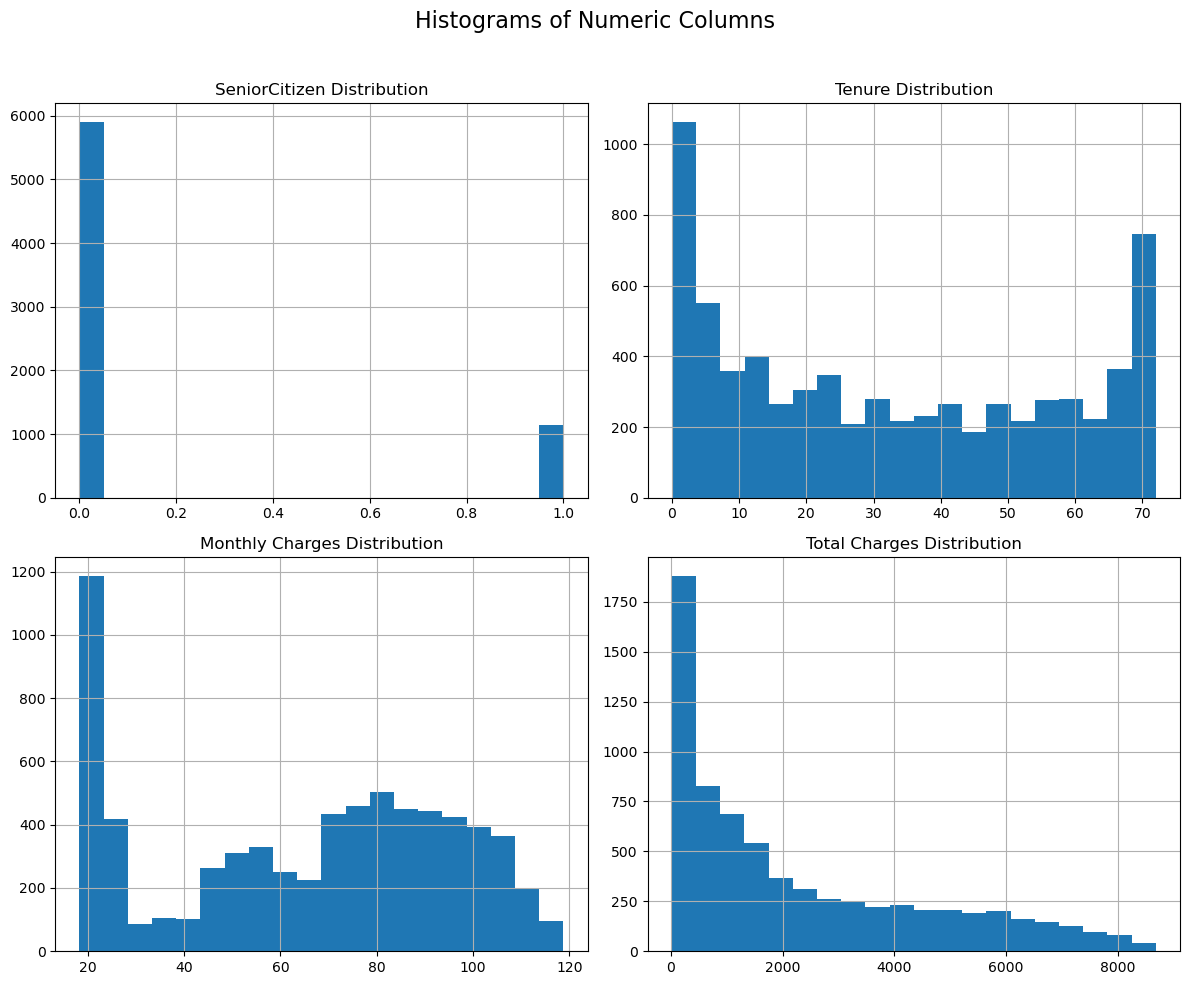

In [53]:
# Update histograms with titles
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(12, 10))

# Add titles to each subplot
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
axes = plt.gcf().get_axes()  # Get all subplot axes
titles = ['SeniorCitizen Distribution', 'Tenure Distribution', 'Monthly Charges Distribution', 'Total Charges Distribution']

# Assign titles to each subplot
for ax, title in zip(axes, titles):
    ax.set_title(title)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the main title
plt.show()


Use bar plots for categorical columns:

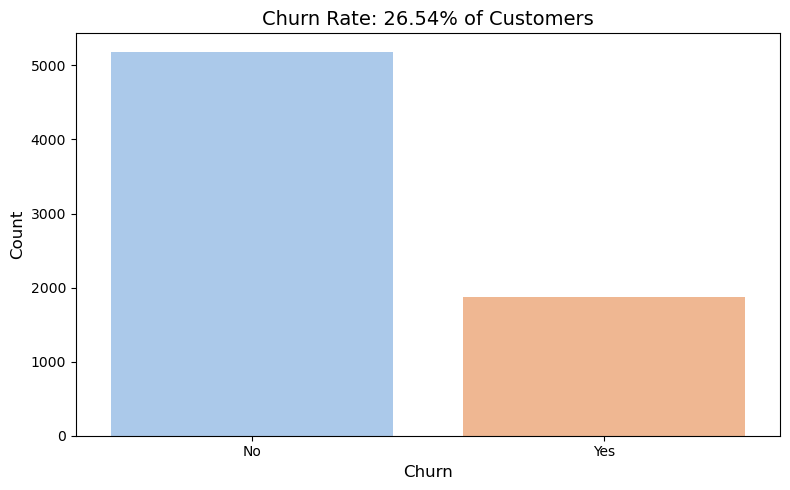

Churn Rate: 26.54%


In [54]:
# Calculate churn percentage
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100

# Create an improved bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title(f"Churn Rate: {churn_rate:.2f}% of Customers", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.savefig("churn_barplot.png")  # Save the plot
plt.show()

# One-liner for churn percentage calculation # The churn rate is approximately 26.5% (1869 out of 7043), with the majority being non-churned customers.
print(f"Churn Rate: {df['Churn'].value_counts(normalize=True)['Yes'] * 100:.2f}%")

In [55]:
# Create a 'plots' directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

plt.savefig("plots/churn_rate_barplot.png")  # Save the plot


<Figure size 640x480 with 0 Axes>

### Insights Gained from Data Definition

1. **Churn Column**:
   - The churn rate is approximately **26.5%**, meaning that the majority of customers (around **73.5%**) have not churned.

2. **TotalCharges Column**:
   - The `TotalCharges` column shows a **wide range** of values, indicating that some customers have been with the service for a significant amount of time, while others are relatively new.
   - Missing values were identified and filled with the **mean TotalCharges** for better consistency.

3. **SeniorCitizen Column**:
   - Only about **16% of customers** are classified as senior citizens, while the remaining **84%** are non-senior customers.

4. **MonthlyCharges Column**:
   - The distribution of `MonthlyCharges` is skewed towards the lower end, with most customers paying between **$20 and $50**, but a smaller subset paying up to **$120**.

5. **Tenure Column**:
   - The `tenure` column shows that a significant number of customers are either **newly subscribed** or **long-term subscribers**, with spikes in shorter and longer tenures.

---


# Step 4: Data Cleaning

Goal: Clean up the data in order to prepare it for the next steps of your project.

■ NA or missing values

■ Duplicates


Handle NA or Missing Values
Check for Missing Values: You've already checked for missing values using df.isnull().sum(). Now, focus on strategies to handle them.

In [56]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Check for Duplicates:


In [57]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**double checking if**

In [58]:
print(f"Is customerID column unique? {df['customerID'].is_unique}")

Is customerID column unique? True


# Data Cleaning Summary
Steps Performed: 

# Checked for Missing Values:

Used df.isnull().sum() to identify missing values in all columns.

Found 11 missing values in the TotalCharges column.

Filled these missing values with the mean of TotalCharges using fillna().

# Checked for Duplicates:

Verified no duplicate rows in the dataset using df.duplicated().sum().

# Verified Data Types:

Ensured appropriate data types for each column.

Converted TotalCharges to a numeric type with pd.to_numeric() to handle any invalid entries.

# Checked for Outliers:

Used visualizations (e.g., histograms) for numerical columns to inspect data distributions (SeniorCitizen, tenure, MonthlyCharges, TotalCharges).

No extreme outliers required removal or transformation.

# Saved the Cleaned Dataset:

Stored the cleaned dataset in the processed_data folder as cleaned_TelecomCxChurn.csv.

# Questions for Discussion:

****What kind of cleaning steps did you perform?**

Checked for missing values, duplicates, and data type mismatches.

Cleaned TotalCharges by imputing missing values with the mean.

**How did you deal with missing values, if there were any?**

Used the mean to fill missing values in the TotalCharges column.

**Were there outliers, and how did you handle them?**

No significant outliers were identified in the data distributions.